<a href="https://colab.research.google.com/github/HeitorAlcantara/tp2_eng.Prompt/blob/main/tp2_eng_prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Configuração Inicial

In [ ]:
import google.generativeai as genai
from google.colab import userdata
userdata.get('GOOGLE_API_KEY')

genai.configure(api_key=userdata.get('GOOGLE_API_KEY'))
model = genai.GenerativeModel("gemini-1.5-flash")

# **Exercício 7:** Resumo de Notícia Utilizando Exemplos em Prompts

In [ ]:
## Notícia da tecnoblog
noticia = """
A Netflix decidiu acabar com o plano Básico no Brasil e começou a comunicar os consumidores sobre a migração em massa para o plano Padrão com Anúncios. Nas redes sociais, adeptos da plataforma de streaming se queixam da mudança, que coloca mais publicidade e intervalos comerciais nos filmes e séries.

A gigante do entretenimento começou a esconder o Básico em 2023 e confirmou em outubro do mesmo ano que iria finalizá-lo. Cerca de 12 meses depois, a Netflix finalmente colocou a estratégia em prática, para desespero de algumas pessoas.
"""

prompt = f"""
Resuma a <NOTICIA> no formato de anotação listando os principais pontos da notícia.

<NOTICIA>
' Uma das maiores empresas fabricantes de foguetes do mundo, SpaceX, acaba de conseguir estacionar o maior foguete do mundo, o Starship. Essa ideia já vinha sendo contruída durante muito tempo pelo fundador Elon Musk e após várias tentativas, finalmente deu certo. Essa conquista revoluciona o mercado de foguetes e a sociedade em geral.
###
<RESUMO>
. SpaceX conseguiu estacionar o maior foguete do mundo, o Starship.
. Após várias tentativas, a empresa de Elon Musk finalmente conseguiu.
. É uma conquista que irá revolucionar não só o mercado, mas a sociedade.

Agora, resume a notícia abaixo:
NOTÍCIA:
{noticia}
###
<RESUMO>
"""

response = model.generate_content(prompt)
print("Resumo")
print("")
print(response.text)

Resumo

## RESUMO:

* **A Netflix encerrou o plano Básico no Brasil.**
* **Os usuários do plano Básico serão migrados para o plano Padrão com Anúncios.**
* **Essa mudança adiciona publicidade e intervalos comerciais aos filmes e séries.**
* **A decisão da Netflix gerou reclamações nas redes sociais.**
* **A Netflix havia começado a esconder o plano Básico em 2023 e confirmou sua extinção em outubro do mesmo ano.**
* **A estratégia foi colocada em prática 12 meses depois.** 



# **Exercício 8:** Identificação de Entidades em Notícias com LLM

In [ ]:
## Notícias do Thenews
noticia_1 = """
Gen Alpha sem TikTok? O primeiro-ministro da Austrália enviou um projeto de lei que pretende criar uma idade mínima de 16 anos para usar as redes sociais.

A proposta deve ser levada para votação ainda neste mês e, se aprovada, as empresas — Meta, TikTok, X, Snapchat, Reddit — terão um ano para resolver como excluir quem não tiver a idade mínima necessária.
"""

noticia_2 = """
O Outback acordou com uma nova dona: a Vinci Partners, que comprou o controle da empresa no Brasil por R$ 2 bilhões.

Com a compra, a empresa fica com 67% do Outback, enquanto a Bloomin’ Brands — holding dona do restaurante australiano — fica com os outros 33%.

Quase 90% do faturamento internacional da Bloomin’ vem do Brasil, chegando a R$ 2,5 bilhões. O sucesso do Outback Brasil — que saiu até no Washington Post do Tio Bezos — salvou a holding.
"""

noticia_3 = """
A ginasta que domina os jogos olímpicos, agora também ocupa o 1° lugar no ranking de atletas com maior nível de popularidade nos Estados Unidos, em um cenário dominado pela NFL e pela NBA, essa popularidade fica ainda mais impressionante.
Simone Biles | 99 pontos
Patrick Mahomes | 87 pontos
Stephen Curry | 75 pontos
Travis Kelce | 70 pontos
"""

In [ ]:
prompt = f"""
Você irá receber 3 <NOTÍCIA> diferentes sobre assuntos diversos. O seu trabalho é identificar nessas notícias diferentes entidades (pessoas, órgãos públicos, empresas, locais citados[cidades, países...]), e as listar no formato do exemplo. Por exemplo:

<NOTÍCIA 1>
'Antes mesmo de assumir a Casa Branca, Trump já anunciou um plano para “desmantelar o deep state e recuperar a democracia da corrupção em Washington de uma vez por todas.'
###
<ENTIDADES>
- *Pessoas:* Donald Trump
- *Órgãos Públicos:* Casa Branca
- *Locais Citados:* Washington

<NOTÍCIA 2>
'A Rússia multou o Google em 20,5 decilhões de dólares pela remoção de conteúdos russos sobre a guerra na Ucrânia.'
###
<ENTIDADES>
- *Empresas:* Google
- *Locais Citados:* Rússia, Ucrânia

Agora, realize a tarefa com as notícias abaixo:
NOTÍCIA 1:
{noticia_1}
###
<ENTIDADES>

NOTÍCIA 2:
{noticia_2}
###
<ENTIDADES>

NOTÍCIA 3:
{noticia_3}
###
<ENTIDADES>

"""

response = model.generate_content(prompt)
print("Resumo")
print("")
print(response.text)

Resumo

## <ENTIDADES> das notícias:

**NOTÍCIA 1:**

- *Pessoas:* Primeiro-ministro da Austrália 
- *Empresas:* Meta, TikTok, X (Twitter), Snapchat, Reddit
- *Grupos:* Gen Alpha
- *Locais Citados:* Austrália

**NOTÍCIA 2:**

- *Empresas:* Outback, Vinci Partners, Bloomin’ Brands
- *Locais Citados:* Brasil, Austrália, Estados Unidos (Washington)
- *Outros:* Tio Bezos (referência a Jeff Bezos, dono do Washington Post)

**NOTÍCIA 3:**

- *Pessoas:* Simone Biles, Patrick Mahomes, Stephen Curry, Travis Kelce
- *Organizações:* NFL, NBA
- *Locais Citados:* Estados Unidos 



In [ ]:
## O prompt foi feito com alguns few-shots e um exemplo de Output. Não só me trouxe o esperado, como também trouxe outros agrupamentos relevantes para a notícia.

# **Exercício 9:** Cálculo de Tokens em Texto Longo com API Gemini

In [ ]:
prompt = "Me gere um texto, em inglês, com 5 mil palavras."

response = model.generate_content(prompt)
print(response.text)

## The Whispering Pines: A Tale of Loss and Renewal

The air was thick with the scent of pine needles and damp earth. A gentle breeze rustled the leaves overhead, whispering secrets to the ancient trees that stood sentinel over the valley. Beneath them, a small cabin nestled amidst the pines, its weathered wood painted a faded gray, a testament to the passage of time. 

Inside, Emily sat by the window, her gaze lost in the swirling mist that danced across the valley floor. The sun, a pale orb veiled by clouds, cast long, skeletal shadows across the landscape, adding to the sense of melancholy that hung heavy in the air. She had been here for a month now, seeking solace in the solitude of the wilderness, a sanctuary from the clamoring grief that threatened to consume her.

The cabin belonged to her grandmother, a woman who had lived her entire life in the embrace of the Whispering Pines, her spirit as strong and enduring as the ancient oaks that surrounded her home. Emily had spent coun

In [ ]:
cinco_mil_palavras = response.text

print("total_tokens: ", model.count_tokens(cinco_mil_palavras)) ## Tokens de entrada

response_token = model.generate_content(cinco_mil_palavras)
print(response_token.usage_metadata) ## Tokens de entrada, saída e total

total_tokens:  total_tokens: 1579

prompt_token_count: 1580
candidates_token_count: 505
total_token_count: 2085



In [ ]:
## Há uma limitação no processamento da quantidade de tokens em LLM's que dificulta e encarece quando se trata de textos longos ou até imagens e vídeos. Podendo atrapalhar nas respostas do LLM.

# **Exercício 11:** Estruturação de Prompts com Arquivo YAML

In [ ]:
import yaml

data = {
    'roteiro': {
        'atenas': 'Liste 3 pontos turísticos de Atenas, diante de cada ponto turístico, coloque também o número anual de visitantes, em integer, e uma breve descrição do local. Estruture a saída no formato JSON.',
        'roma': 'Liste 3 pontos turísticos de Roma, diante de cada ponto turístico, coloque também o número anual de visitantes, em integer, e uma breve descrição do local. Estruture a saída no formato JSON.'
    }
}

with open("roteiro.yaml", "w") as file:
    yaml.dump(data, file, allow_unicode=True)

In [ ]:
from google.colab import files
files.download("roteiro.yaml")

In [ ]:
with open("roteiro.yaml") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

config


response_atenas = model.generate_content(config['roteiro']['atenas'])
response_roma = model.generate_content(config['roteiro']['roma'])

print("Roteiro de Atenas gerado pelo LLM:")
print(response_atenas.text)
print("")
print("Roteiro de Roma gerado pelo LLM:")
print(response_roma.text)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Roteiro de Atenas gerado pelo LLM:
## 3 Pontos turísticos de Atenas:

**1. Acrópole de Atenas:**

* **Número anual de visitantes:**  Aproximadamente 3 milhões.

* **Descrição:** Um dos monumentos mais icônicos da Grécia e do mundo, a Acrópole é um complexo de templos e edifícios antigos, incluindo o Partenon, erguidos no alto de uma colina rochosa. A vista panorâmica da cidade é deslumbrante, e a história que permeia o local é simplesmente fascinante.

**2. Museu da Acrópole:**

* **Número anual de visitantes:** Aproximadamente 1,5 milhões.

* **Descrição:** Localizado na encosta da Acrópole, este museu abriga uma coleção impressionante de artefatos e esculturas da Acrópole, incluindo algumas das famosas cariátides do Erechtheion. É imperdível para quem quer mergulhar na história e arte da Grécia Antiga.

**3. Ágora Antiga:**

* **Número anual de visitantes:** Aproximadamente 500.000.

* **Descrição:** A Ágora Antiga era o coração da vida social, política e comercial de Atenas na antig

In [ ]:
## Os pontos turísticos são bem descritivos e relevantes para cada cidade. Traz os pontos mais famosos.

# **Exercício 12:** Sistema de Envio de Emails com Dados Turísticos em JSON

In [ ]:
with open("roteiro.yaml") as stream:
    try:
        config = yaml.safe_load(stream)
    except yaml.YAMLError as exc:
        print(exc)

config

response_atenas = model.generate_content(config['roteiro']['atenas'])
response_roma = model.generate_content(config['roteiro']['roma'])

Text(0.5, 1.0, 'Pontos Turísticos por Visitantes Anuais')

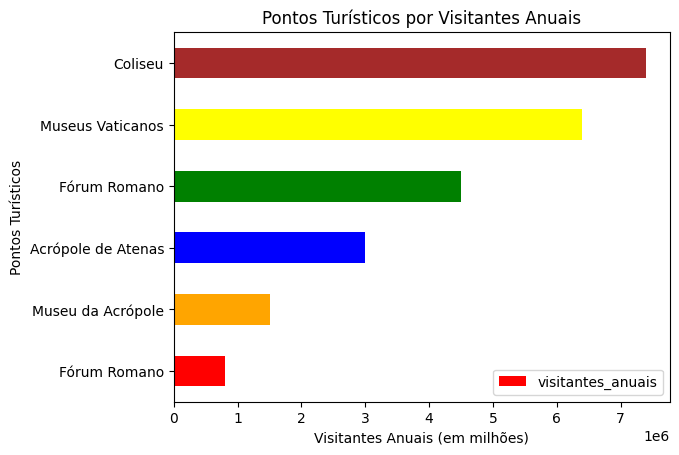

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import json

response_atenas_json = json.loads(response_atenas.text.replace("```json\n",'').replace("\n```",''))
response_roma_json = json.loads(response_roma.text.replace("```json\n",'').replace("\n```",''))

pontos_turisticos_atenas = [(x['nome'], x['visitantes']) for x in response_atenas_json['pontos_turisticos']]
pontos_turisticos_roma = [(x['nome'], x['visitantes']) for x in response_roma_json['pontos_turisticos']]
pontos_turisticos = pontos_turisticos_atenas + pontos_turisticos_roma


df_pontos_turisticos = pd.DataFrame(pontos_turisticos)
df_pontos_turisticos.columns = ['pontos_turisticos', 'visitantes_anuais']

df_pontos_turisticos['visitantes_anuais'] = pd.to_numeric(df_pontos_turisticos['visitantes_anuais'])
colors = ["red", "orange", "blue", "green", "yellow", "brown"]

df_pontos_turisticos.sort_values('visitantes_anuais', ascending=True).plot.barh(x='pontos_turisticos', y='visitantes_anuais', color = colors)
plt.xlabel('Visitantes Anuais (em milhões)')
plt.ylabel('Pontos Turísticos')
plt.title('Pontos Turísticos por Visitantes Anuais')